In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="darkgrid")

In [3]:
# Load data
df = pd.read_csv("E://COVID-19 python//covid_world_stats.csv", parse_dates=['Date'])

In [4]:
# Preview
print(df.head())

  Country/Region       Date  Overall Confirmed  Overall Recovered  \
0    Afghanistan 2020-02-24                1.0                0.0   
1    Afghanistan 2020-02-25                1.0                0.0   
2    Afghanistan 2020-02-26                1.0                0.0   
3    Afghanistan 2020-02-27                1.0                0.0   
4    Afghanistan 2020-02-28                1.0                0.0   

   Overall Deaths  Confirmed Increase  Recovered Increase  Deaths Increase  \
0             0.0                 1.0                 0.0              0.0   
1             0.0                 0.0                 0.0              0.0   
2             0.0                 0.0                 0.0              0.0   
3             0.0                 0.0                 0.0              0.0   
4             0.0                 0.0                 0.0              0.0   

   Active Cases  
0           1.0  
1           1.0  
2           1.0  
3           1.0  
4           1.0  


In [6]:
# Fill missing Country/Region with empty string
df['Country/Region'].fillna('', inplace=True)

In [8]:
# Create a new 'Country' level data by grouping
country_df = df.groupby(['Date', 'Country/Region'])[['Overall Confirmed', 'Overall Deaths', 'Overall Recovered']].sum().reset_index()

In [10]:
# Top 5 countries with the most confirmed cases (latest date)
latest_date = country_df['Date'].max()
top_countries = country_df[country_df['Date'] == latest_date].sort_values(by='Overall Confirmed', ascending=False).head(5)['Country/Region'].tolist()

print("\nTop 5 countries by confirmed cases:", top_countries)


Top 5 countries by confirmed cases: ['US', 'India', 'Brazil', 'Russia', 'Colombia']


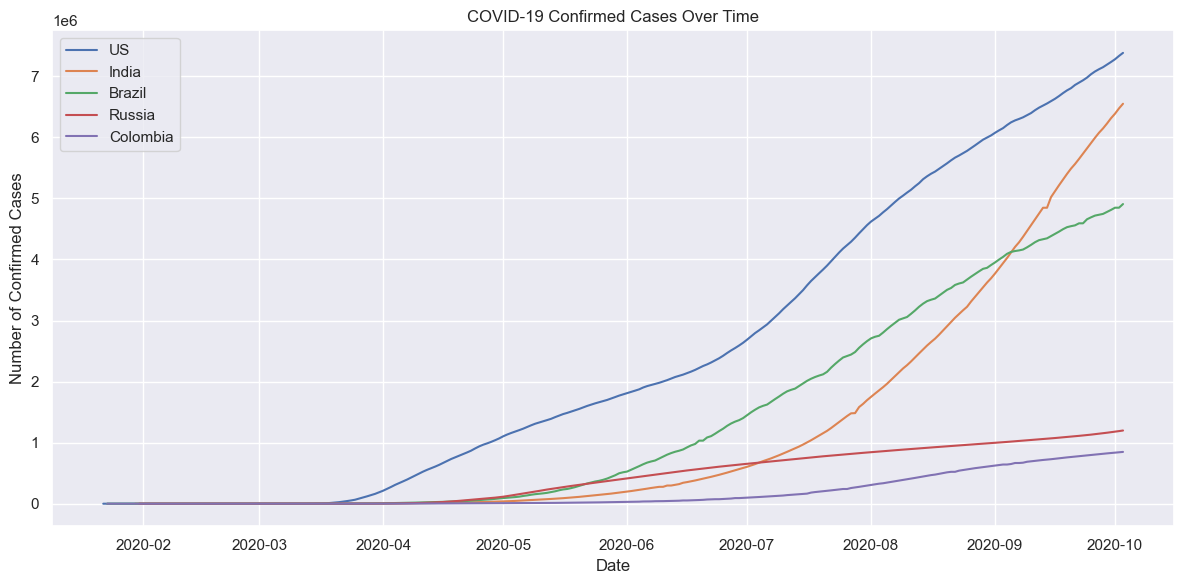

In [11]:
# Plot: Confirmed cases over time for top 5 countries
plt.figure(figsize=(12, 6))
for country in top_countries:
    temp = country_df[country_df['Country/Region'] == country]
    plt.plot(temp['Date'], temp['Overall Confirmed'], label=country)

plt.title('COVID-19 Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.legend()
plt.tight_layout()
plt.show()


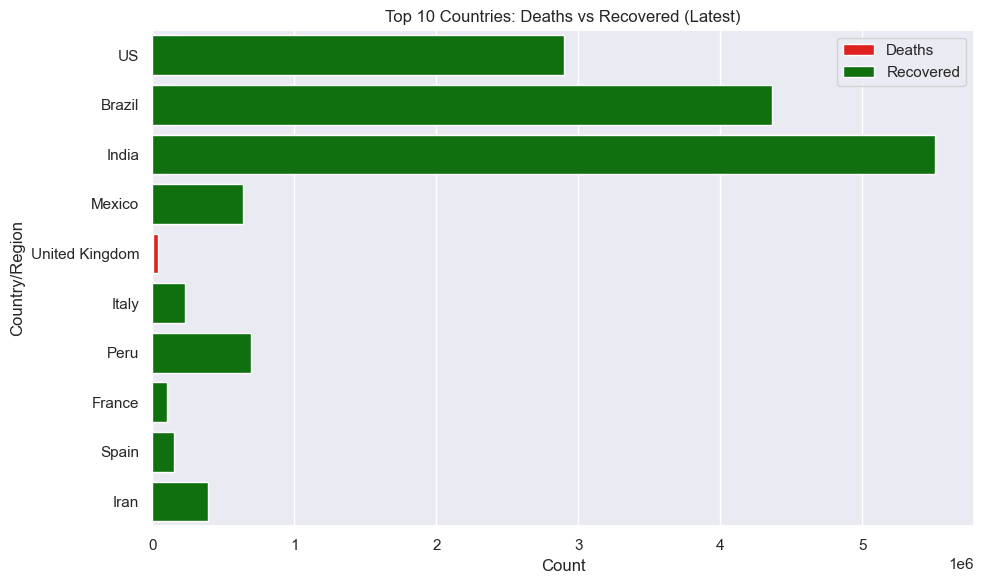

In [12]:
# Plot: Deaths vs Recovered on the latest date
latest = country_df[country_df['Date'] == latest_date]
top_deaths = latest.sort_values(by='Overall Deaths', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Overall Deaths', y='Country/Region', data=top_deaths, color='red', label='Deaths')
sns.barplot(x='Overall Recovered', y='Country/Region', data=top_deaths, color='green', label='Recovered')

plt.title("Top 10 Countries: Deaths vs Recovered (Latest)")
plt.xlabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

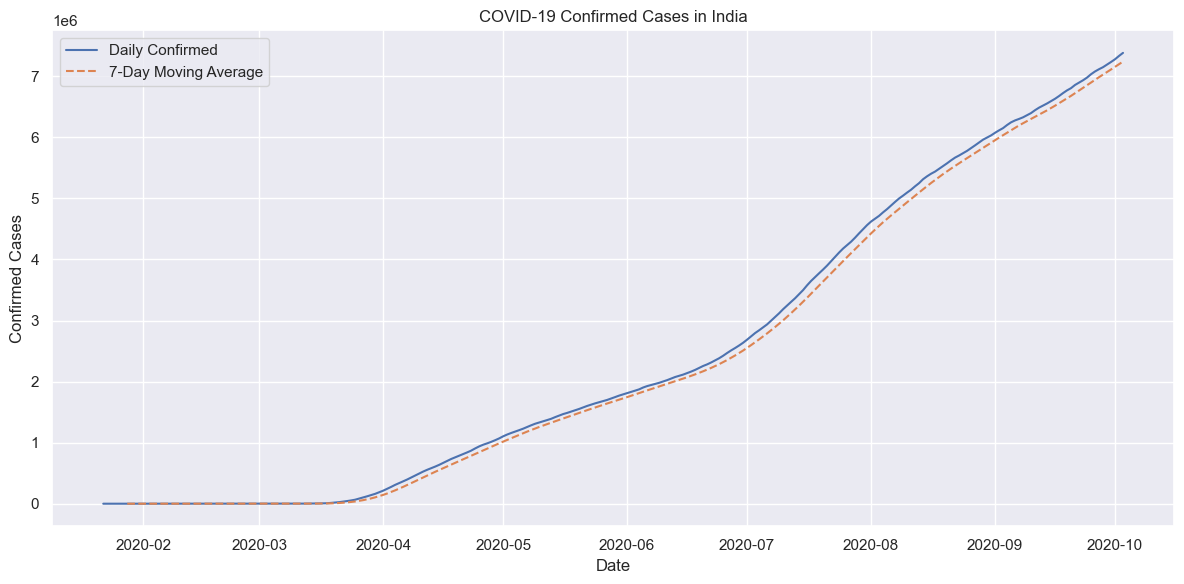

In [14]:
# Moving average trend (e.g., USA)
country = 'India'
ind_data = country_df[country_df['Country/Region'] == country].copy()
ind_data['7_day_avg'] = ind_data['Overall Confirmed'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(us_data['Date'], us_data['Overall Confirmed'], label='Daily Confirmed')
plt.plot(us_data['Date'], us_data['7_day_avg'], label='7-Day Moving Average', linestyle='--')
plt.title(f'COVID-19 Confirmed Cases in {country}')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.tight_layout()
plt.show()